## FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

#### Part 1: Data Preparation and Exploration -

1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

#### Part 2: Model Building - ARIMA -

1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

#### Part 3: Model Building - Exponential Smoothing -

1.Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

2.Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

3.Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.


#### Part 4: Evaluation and Comparison -

1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


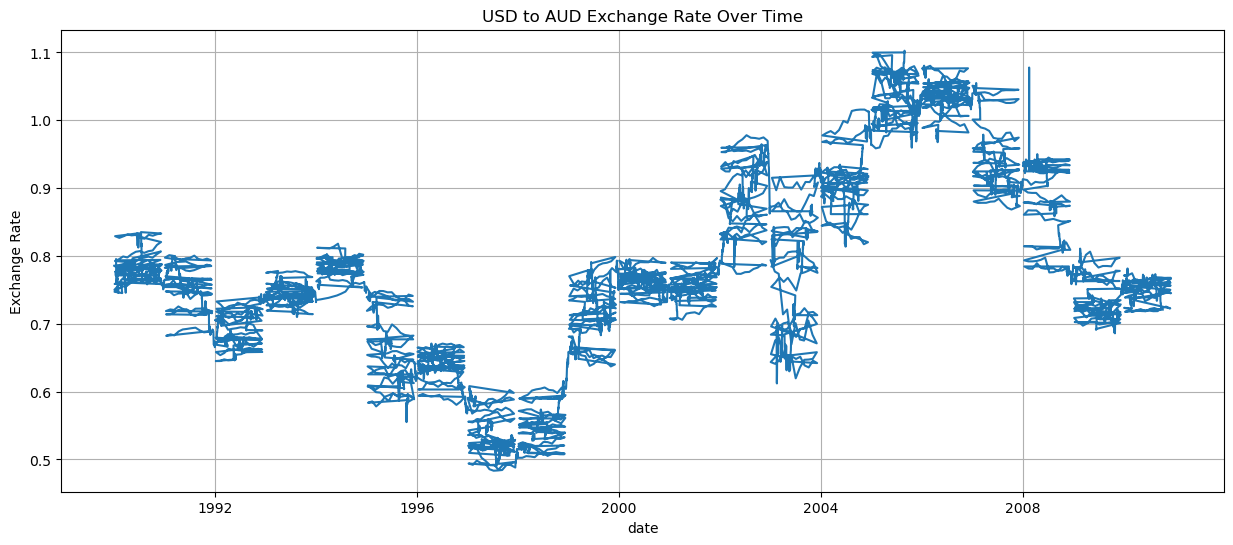

Missing values:
 date       0
Ex_rate    0
dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('exchange_rate.csv')

# Parse the date column
data['date'] = pd.to_datetime(data['date'])

# Initial exploration
plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['Ex_rate'])
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values
data.fillna(method='ffill', inplace=True)


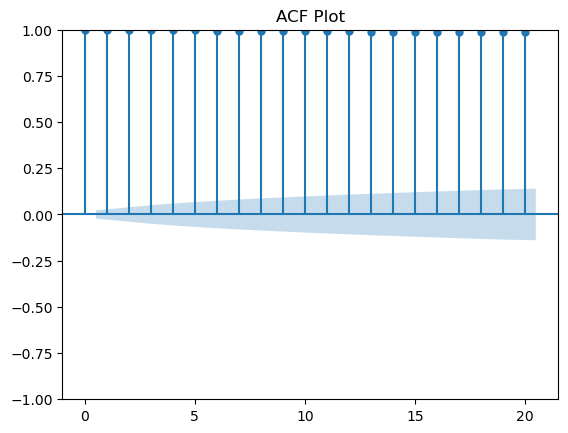

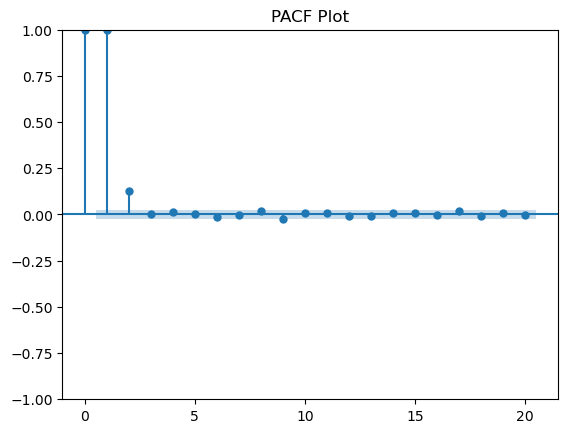

C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


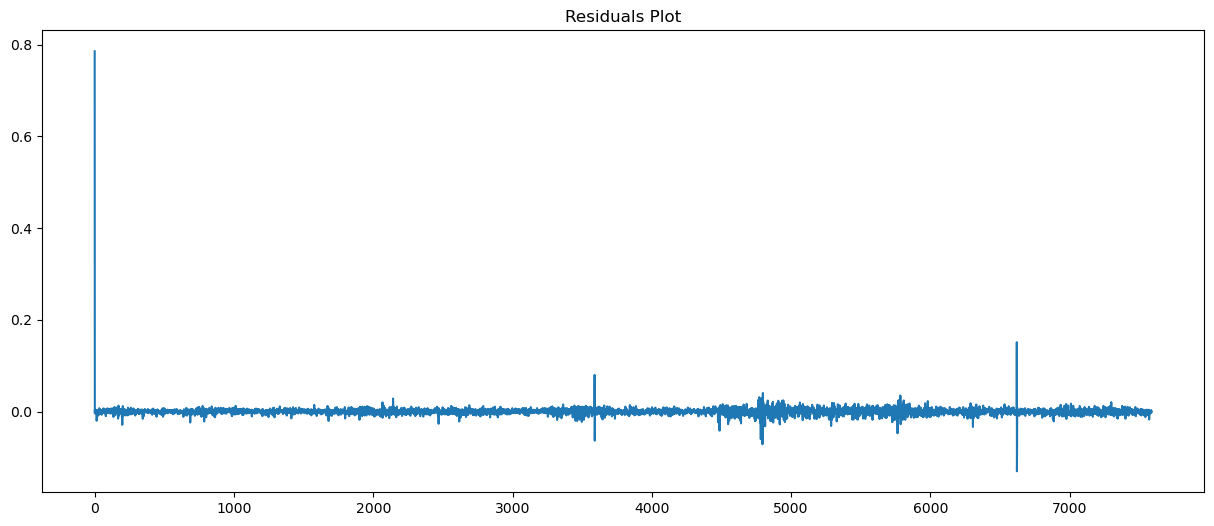

RMSE: 0.016982710912755217


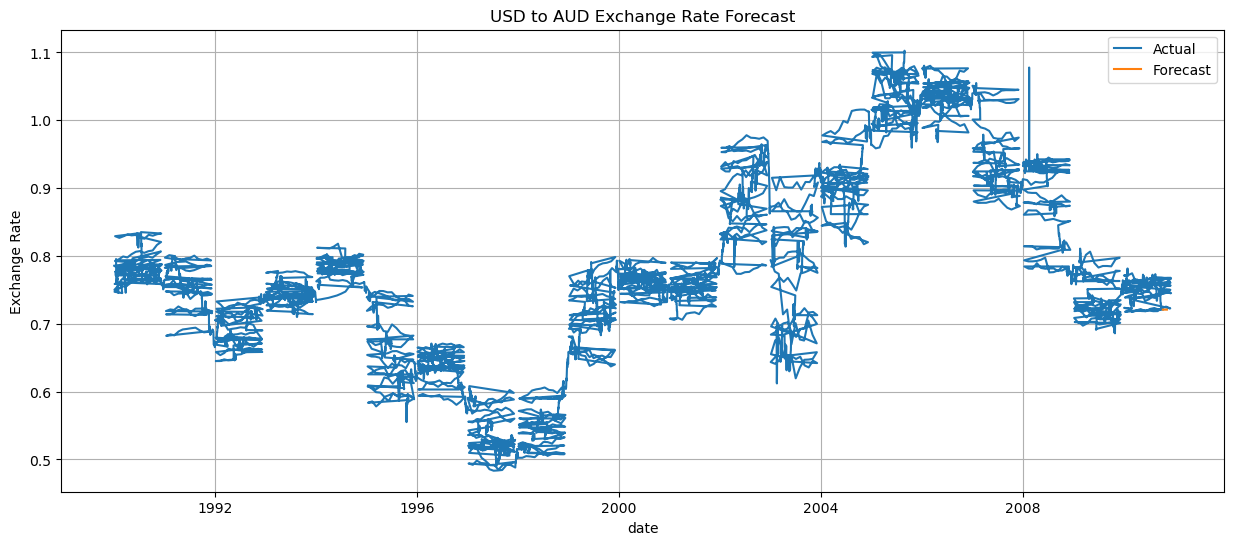

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Plot ACF and PACF
plot_acf(data['Ex_rate'], lags=20)
plt.title('ACF Plot')
plt.show()

plot_pacf(data['Ex_rate'], lags=20)
plt.title('PACF Plot')
plt.show()

# Fit ARIMA model
model = ARIMA(data['Ex_rate'], order=(1, 1, 1))
model_fit = model.fit()

# Diagnostics
residuals = model_fit.resid
plt.figure(figsize=(15, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.show()

# Forecasting
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data['date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]
actual = data['Ex_rate'][-forecast_steps:]

# Evaluate the model
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot forecast
plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['Ex_rate'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast')
plt.title('USD to AUD Exchange Rate Forecast')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


RMSE: 0.017247277223000405


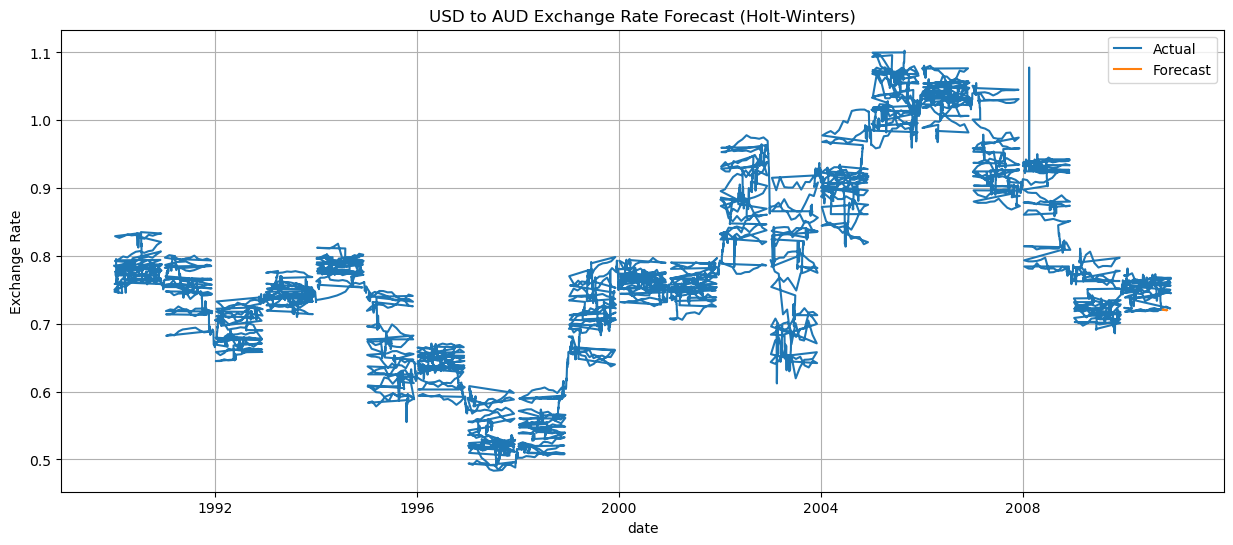

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecasting
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Evaluate the model
actual = data['Ex_rate'][-forecast_steps:]
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot forecast
forecast_index = pd.date_range(start=data['date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]
plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['Ex_rate'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast')
plt.title('USD to AUD Exchange Rate Forecast (Holt-Winters)')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('exchange_rate.csv')

# Display the first few rows and column names to verify
print(data.head())
print(data.columns)


               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
Index(['date', 'Ex_rate'], dtype='object')


In [5]:
# Parse dates and set the date column as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Display summary statistics and check for missing values
print(data.describe())
print(data.isnull().sum())


           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536
Ex_rate    0
dtype: int64


In [12]:
# Define error metric functions
def compute_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def compute_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def compute_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Split the dataset into training and test sets (80-20 split)
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit the ARIMA model
arima_model = sm.tsa.ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Perform forecasting
arima_forecast = arima_fit.forecast(steps=len(test))


C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\Lib\site-

In [20]:

# Compute error metrics
arima_mae = compute_mae(test, arima_forecast)
arima_rmse = compute_rmse(test, arima_forecast)

print(f'ARIMA MAE: {arima_mae:.4f}')
print(f'ARIMA RMSE: {arima_rmse:.4f}')


ARIMA MAE: 0.1778
ARIMA RMSE: 0.2055


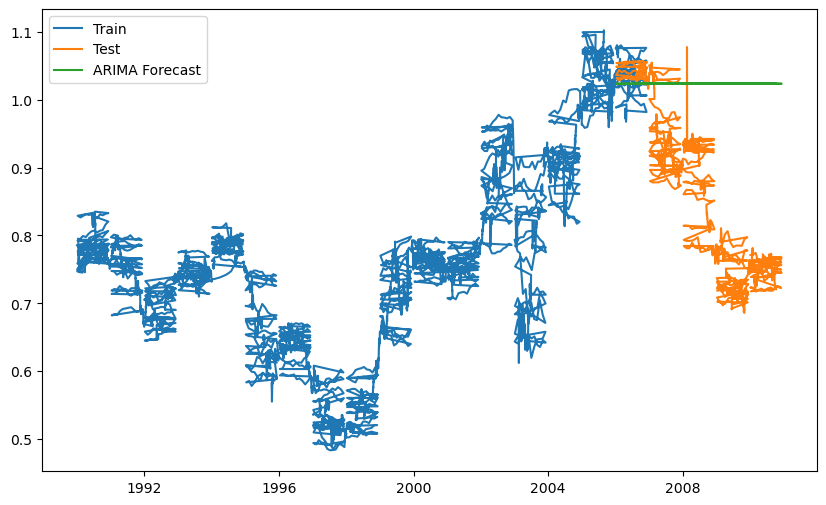

In [21]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model
exp_model = ExponentialSmoothing(train, trend='add', seasonal=None, seasonal_periods=None)
exp_fit = exp_model.fit()

# Perform forecasting
exp_forecast = exp_fit.forecast(steps=len(test))


C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\prana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:

# Compute error metrics
exp_mae = compute_mae(test, exp_forecast)
exp_rmse = compute_rmse(test, exp_forecast)
exp_mape = compute_mape(test, exp_forecast)

print(f'Exponential Smoothing MAE: {exp_mae:.4f}')
print(f'Exponential Smoothing RMSE: {exp_rmse:.4f}')



Exponential Smoothing MAE: 0.1903
Exponential Smoothing RMSE: 0.2201


C:\Users\prana\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


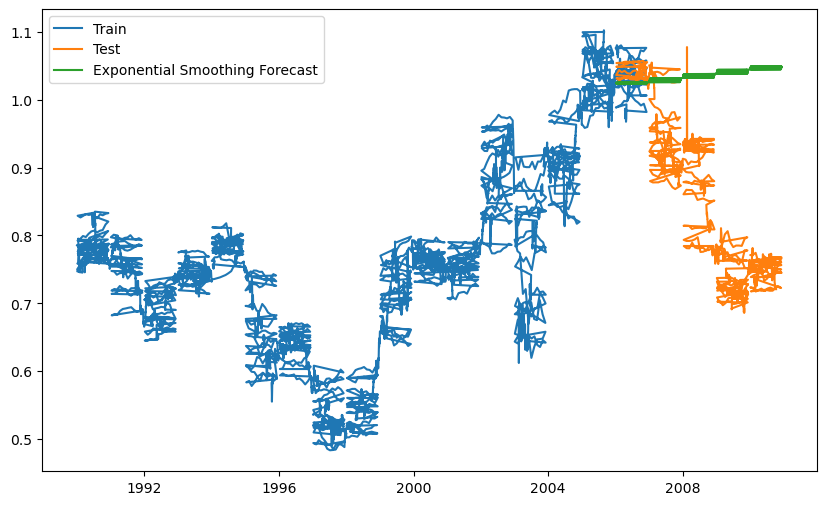

In [24]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, exp_forecast, label='Exponential Smoothing Forecast')
plt.legend()
plt.show()


In [25]:
# Model Comparison
print('Model Comparison:')
print(f'ARIMA - MAE: {arima_mae:.4f}, RMSE: {arima_rmse:.4f}')
print(f'Exponential Smoothing - MAE: {exp_mae:.4f}, RMSE: {exp_rmse:.4f}')


Model Comparison:
ARIMA - MAE: 0.1778, RMSE: 0.2055
Exponential Smoothing - MAE: 0.1903, RMSE: 0.2201
